# Sequencer instructions

## Single channel

The module `core.device.sequencer.instructions` provides instructions that can be used to generate complex time sequences. 

The compilation algorithm generates such instructions based on the user input. 
The instructions are then sent to the sequencer devices whose only role is to program these instructions in the hardware.

The basic building block is a `Pattern` that can be used to explicitly represent an arbitrary sequence of values to be output on a sequencer for each timestep.

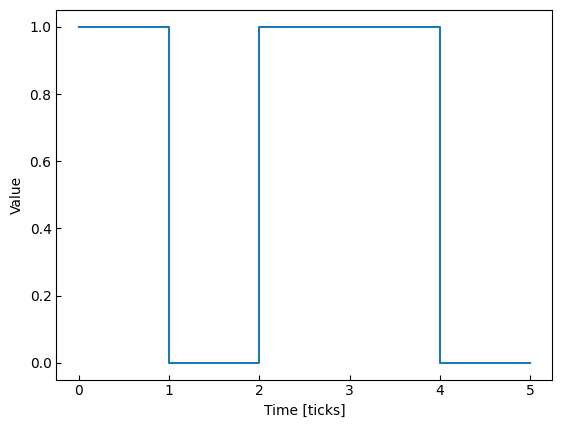

In [1]:
from core.device.sequencer.instructions import Pattern, convert_to_change_arrays
import matplotlib.pyplot as plt

pattern = Pattern([True, False, True, True, False])

def plot_instruction(instruction):
    times, values = convert_to_change_arrays(instruction)
    plt.plot(times, values, drawstyle='steps-post')
    plt.xlabel("Time [ticks]")
    plt.ylabel("Value")

plot_instruction(pattern)

Patterns can be combined by additioning or multiplying them, which allows to build complex instructions efficiently.

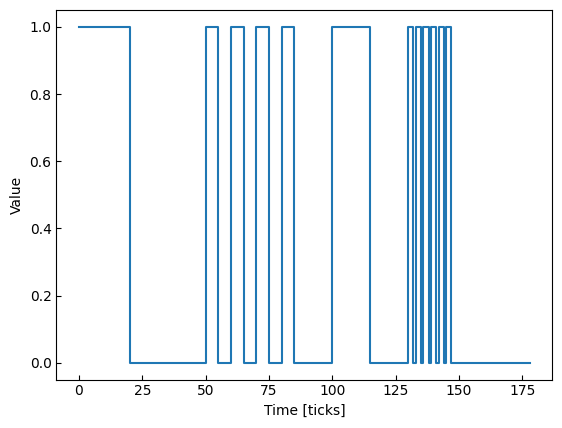

In [2]:
instr_1 = (
    20 * Pattern([True])
    + 30 * Pattern([False])
    + 4 * (5 * Pattern([True]) + 5 * Pattern([False]))
    + 10 * Pattern([False])
    + 15 * Pattern([True])
    + 15 * Pattern([False])
    + 6 * Pattern([True, True, False])
    + 30 * Pattern([False])
)

plot_instruction(instr_1)

All subclasses of `SequencerInstruction` (`Pattern`, `Concatenate` and `Repeat`) overloads `+` and `*` operators to easily combine instructions. 

Combining instructions with these operators will build a tree of operations but will never evaluate it unless explicitly asked.

In [3]:
instr_2 = 7 * Pattern([True]) + 3 * Pattern([False])
instr_2

Concatenate(Repeat(repetitions=7, instruction=Pattern([True])), Repeat(repetitions=3, instruction=Pattern([False])))

If we want to convert the tree instruction to a flat representation, we can use the method `.to_pattern()`. 

In [4]:
instr_2.to_pattern()

Pattern([True, True, True, True, True, True, True, False, False, False])

It is however often much more convenient to work with the tree representation because it allows to represent instructions with many time steps very compactly.

## Combining channels

Using the above techniques, it is possible to construct complex time sequence for a single output channel of a sequencer.

In [5]:
from core.device.sequencer.instructions import with_name, stack_instructions

clock_0 = Pattern([True, False]) * 15
clock_1 = Pattern([True, True, False]) * 10

toggle = Pattern([True]) * 10 + Pattern([False]) * 20

In [9]:
stacked = stack_instructions(
    [with_name(clock_0, "ch 0"),
    with_name(clock_1, "ch 1"),
    with_name(toggle, "ch 2"),
    ]
)